In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Further, they want to build a business case to implement retention improvement initiatives by estimating the impact to key business metrics.

df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [4]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [5]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


<Axes: ylabel='Age'>

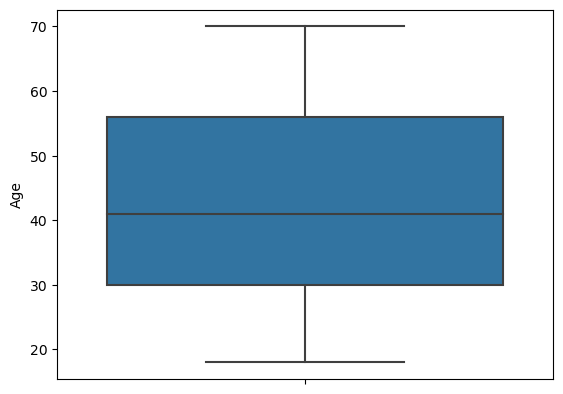

In [11]:
sns.boxplot(df[df['Churned'] == 1],y='Age')

In [50]:
#check if the max is reasonable
df[df['Average_Session_Length'] > 11.4]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
60,61,64,Other,West,2020-08-08 01:53:37.657676,Standard,14.99,Direct Debit,15.770722,Drama,Tablet,11.417557,1018,3,1,2021-03-15 01:53:37.657676,Price increase


In [65]:
df[df['Monthly_Hours_Watched'] > 139]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
697,698,63,Female,South,2021-07-15 01:53:37.664613,Standard,14.99,Credit Card,139.170408,Sci-Fi,Mobile,1.332512,1064,2,0,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [37]:
#check for missing value
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [38]:
#calculate churn rate
churn_rate=df['Churned'].mean()

In [40]:
df.groupby('Subscription_Type')['Churned'].mean()

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

In [73]:
df_1 = df[df['Churned'] == 1].sort_values(by=['Location','Age','Gender'],ascending=[False,True,False])
df_2 = df[df['Churned'] != 1]

In [76]:
df_1.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,505.361789,43.174797,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0
std,284.676765,15.507139,3.494289,17.236483,1.841691,30.536877,1.273513,0.0
min,13.000000,18.000000,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0
25%,273.250000,30.000000,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0
50%,501.500000,41.000000,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0
75%,752.250000,56.000000,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0
max,999.000000,70.000000,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0


In [75]:
df_2.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0
mean,498.913793,44.779841,14.605385,19.734607,1.885177,1048.795756,3.172414,0.0
std,290.327761,15.250257,3.377227,19.866013,1.878760,28.851328,1.440076,0.0
min,1.000000,18.000000,9.990000,0.076891,0.000486,1000.000000,1.000000,0.0
25%,245.250000,32.000000,9.990000,5.657050,0.516868,1023.000000,2.000000,0.0
50%,500.000000,45.500000,14.990000,13.791423,1.271808,1047.500000,3.000000,0.0
75%,748.500000,57.000000,14.990000,27.368681,2.612418,1074.000000,4.000000,0.0
max,1000.000000,70.000000,19.990000,139.170408,11.049324,1099.000000,5.000000,0.0
